# Twitter Sentiment Analysis

In [175]:
import csv
import numpy as np
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import pos_tag

### Read train csv file

In [2]:
import pandas as pd
train_csv_File = pd.read_csv('train.csv')

### Read test csv file

In [3]:
test_csv_File=pd.read_csv('test.csv')
review_text_test=test_csv_File["text"]

### Review text and sentiment

In [4]:
review_text=train_csv_File["text"]
sentiments=train_csv_File["airline_sentiment"]

### Tags for Lemmetization

In [5]:
def get_simple_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('N'):
        return wordnet.NOUN
    else:
        return wordnet.NOUN

### Download Stopwords 

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
numbers=["0","1","2","3","4","5","6","7","8","9","one"]
stp_wrds=stopwords.words('english')
stp_wrds+=numbers

### Download Punctuations 


In [86]:
import string
punt=list(string.punctuation)

### Removing the punctuations and stopwords

In [118]:
### for training data
tokenized_words=[]
for ele in review_text:
    tokenized_words.append([word .lower() for word in word_tokenize(ele) if word.lower()not in punt+stp_wrds])
### for testing data
tokenized_words_test=[]
for ele in review_text_test:
    tokenized_words_test.append([word .lower() for word in word_tokenize(ele) if word.lower()not in punt+stp_wrds])

### Getting pos_tag for corresponding words

In [119]:
### for train data
postagwords=[]
for ele in tokenized_words:
    postagwords.append(pos_tag(ele))
### for test data
postagwords_test=[]
for ele in tokenized_words_test:
    postagwords_test.append(pos_tag(ele))
    

### Lemmatize the words

In [91]:
from nltk.stem import WordNetLemmatizer

In [92]:
lmtzr=WordNetLemmatizer()

In [120]:
### for train data
complete_list=[]
for listofwords in postagwords:
    new_list=[]
    for ele in listofwords:
        new_list.append(lmtzr.lemmatize((ele[0]),pos=get_simple_tag(ele[1])))
    complete_list.append(new_list)
### for train data
complete_list_test=[]
for listofwords in postagwords_test:
    new_list=[]
    for ele in listofwords:
        new_list.append(lmtzr.lemmatize((ele[0]),pos=get_simple_tag(ele[1])))
    complete_list_test.append(new_list)

In [174]:
### for train data
list_of_words=[ " ".join(ele) for ele in complete_list]
### for test data
list_of_words_test=[" ".join(ele) for ele in complete_list_test]

### Feature Selection using CountVectorizer

In [257]:
from sklearn.feature_extraction.text import CountVectorizer

In [258]:
### for train data
count_vect=CountVectorizer(max_features=2250,ngram_range=(1,3),max_df=.80,min_df=.1)
review_matrix=count_vect.fit_transform(list_of_words)
review_array=np.array(review_matrix.todense())
### for test data

review_matrix_test=count_vect.transform(list_of_words_test)
review_array_test=np.array(review_matrix_test.todense())

In [259]:
review_array.shape

(10980, 7)

### Using Raw Data

In [148]:
## for train data
review_text_lower=[]
for ele in review_text:
    review_text_lower.append(ele.lower())
## for test data
review_text_test_lower=[]
for ele in review_text_test:
    review_text_test_lower.append(ele.lower())
    

### Using TFIDF Vectorizer

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [267]:
def count_vectorize(n,j):
    count_vect=TfidfVectorizer(max_features=n,ngram_range=(1,3),max_df=j)
    review_matrix=count_vect.fit_transform(review_text_lower)
    review_array=np.array(review_matrix.todense())
    ## for test data
    review_matrix_test=count_vect.transform(review_text_test_lower)
    review_array_test=np.array(review_matrix_test.todense())
    return review_array,review_array_test

In [272]:
review_array,review_array_test=count_vectorize(2500,.85)

In [273]:
review_array.shape

(10980, 2500)

In [668]:
import matplotlib.pyplot as plt

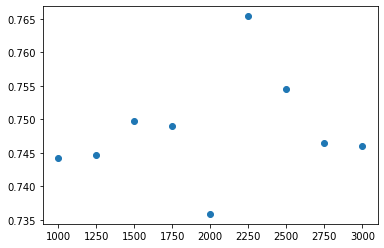

In [678]:
# plt1=fig.add_subplot(231)
plt.scatter(feature_value,predicted_values)

### Using Naive Nyase Classifier

In [204]:
from sklearn.naive_bayes import MultinomialNB

In [274]:
ml=MultinomialNB()
ml.fit(review_array,sentiments)

MultinomialNB()

### Predict the result

In [275]:
predictions=ml.predict(review_array_test)

### Save the predictions in result.csv file

In [276]:
np.savetxt("result.csv",predictions,fmt='%s')

### wordcloud representation of features

In [32]:
import matplotlib.pyplot as plt

C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


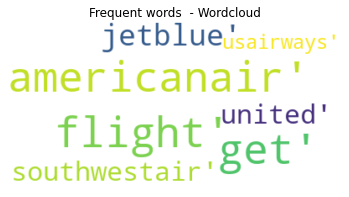

In [194]:
frequency_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(str(count_vect.get_feature_names()))
plt.figure()
plt.title("Frequent words  - Wordcloud")
plt.imshow(frequency_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()